In [6]:
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd

In [7]:
import random
import numpy as np

import tic_tac_toe as ttt
import data_set as ds
import neural_network as nn

seed = 867342
data_set_file_name = "data_set.csv"
model_file_name = "model.h5"

random.seed(seed)
np.random.seed(int(seed))

data_set = ds.read_data_set(data_set_file_name)
training_set = data_set
x, y_true = nn.get_data_for_neural_network(training_set, nn.get_win_loss_draw_ratio)
model = nn.create_fit_model(x, y_true)
y_pred = model.predict(x)

Epoch 1/10
5478/5478 [==============================] - 0s 40us/step - loss: 0.2592 - mean_squared_error: 0.2592 - mean_absolute_error: 0.3936
Epoch 2/10
5478/5478 [==============================] - 0s 8us/step - loss: 0.0964 - mean_squared_error: 0.0964 - mean_absolute_error: 0.2367
Epoch 3/10
5478/5478 [==============================] - 0s 7us/step - loss: 0.0743 - mean_squared_error: 0.0743 - mean_absolute_error: 0.2061
Epoch 4/10
5478/5478 [==============================] - 0s 8us/step - loss: 0.0693 - mean_squared_error: 0.0693 - mean_absolute_error: 0.2005
Epoch 5/10
5478/5478 [==============================] - 0s 8us/step - loss: 0.0678 - mean_squared_error: 0.0678 - mean_absolute_error: 0.1995
Epoch 6/10
5478/5478 [==============================] - 0s 7us/step - loss: 0.0671 - mean_squared_error: 0.0671 - mean_absolute_error: 0.1988
Epoch 7/10
5478/5478 [==============================] - 0s 9us/step - loss: 0.0668 - mean_squared_error: 0.0668 - mean_absolute_error: 0.1986
Epoch

In [8]:
error_function_list = [lambda y_t, y_p: list(map(lambda t, p: abs(t - p), y_t, y_p))]
errors = nn.compute_errors(model, x, y_true, y_pred, error_function_list)

opacity = 0.5
color = 'orange'
edge_color = 'black'
num_errors = len(errors)
y_size = nn.get_y_size_from_errors(errors)

<IPython.core.display.Javascript object>


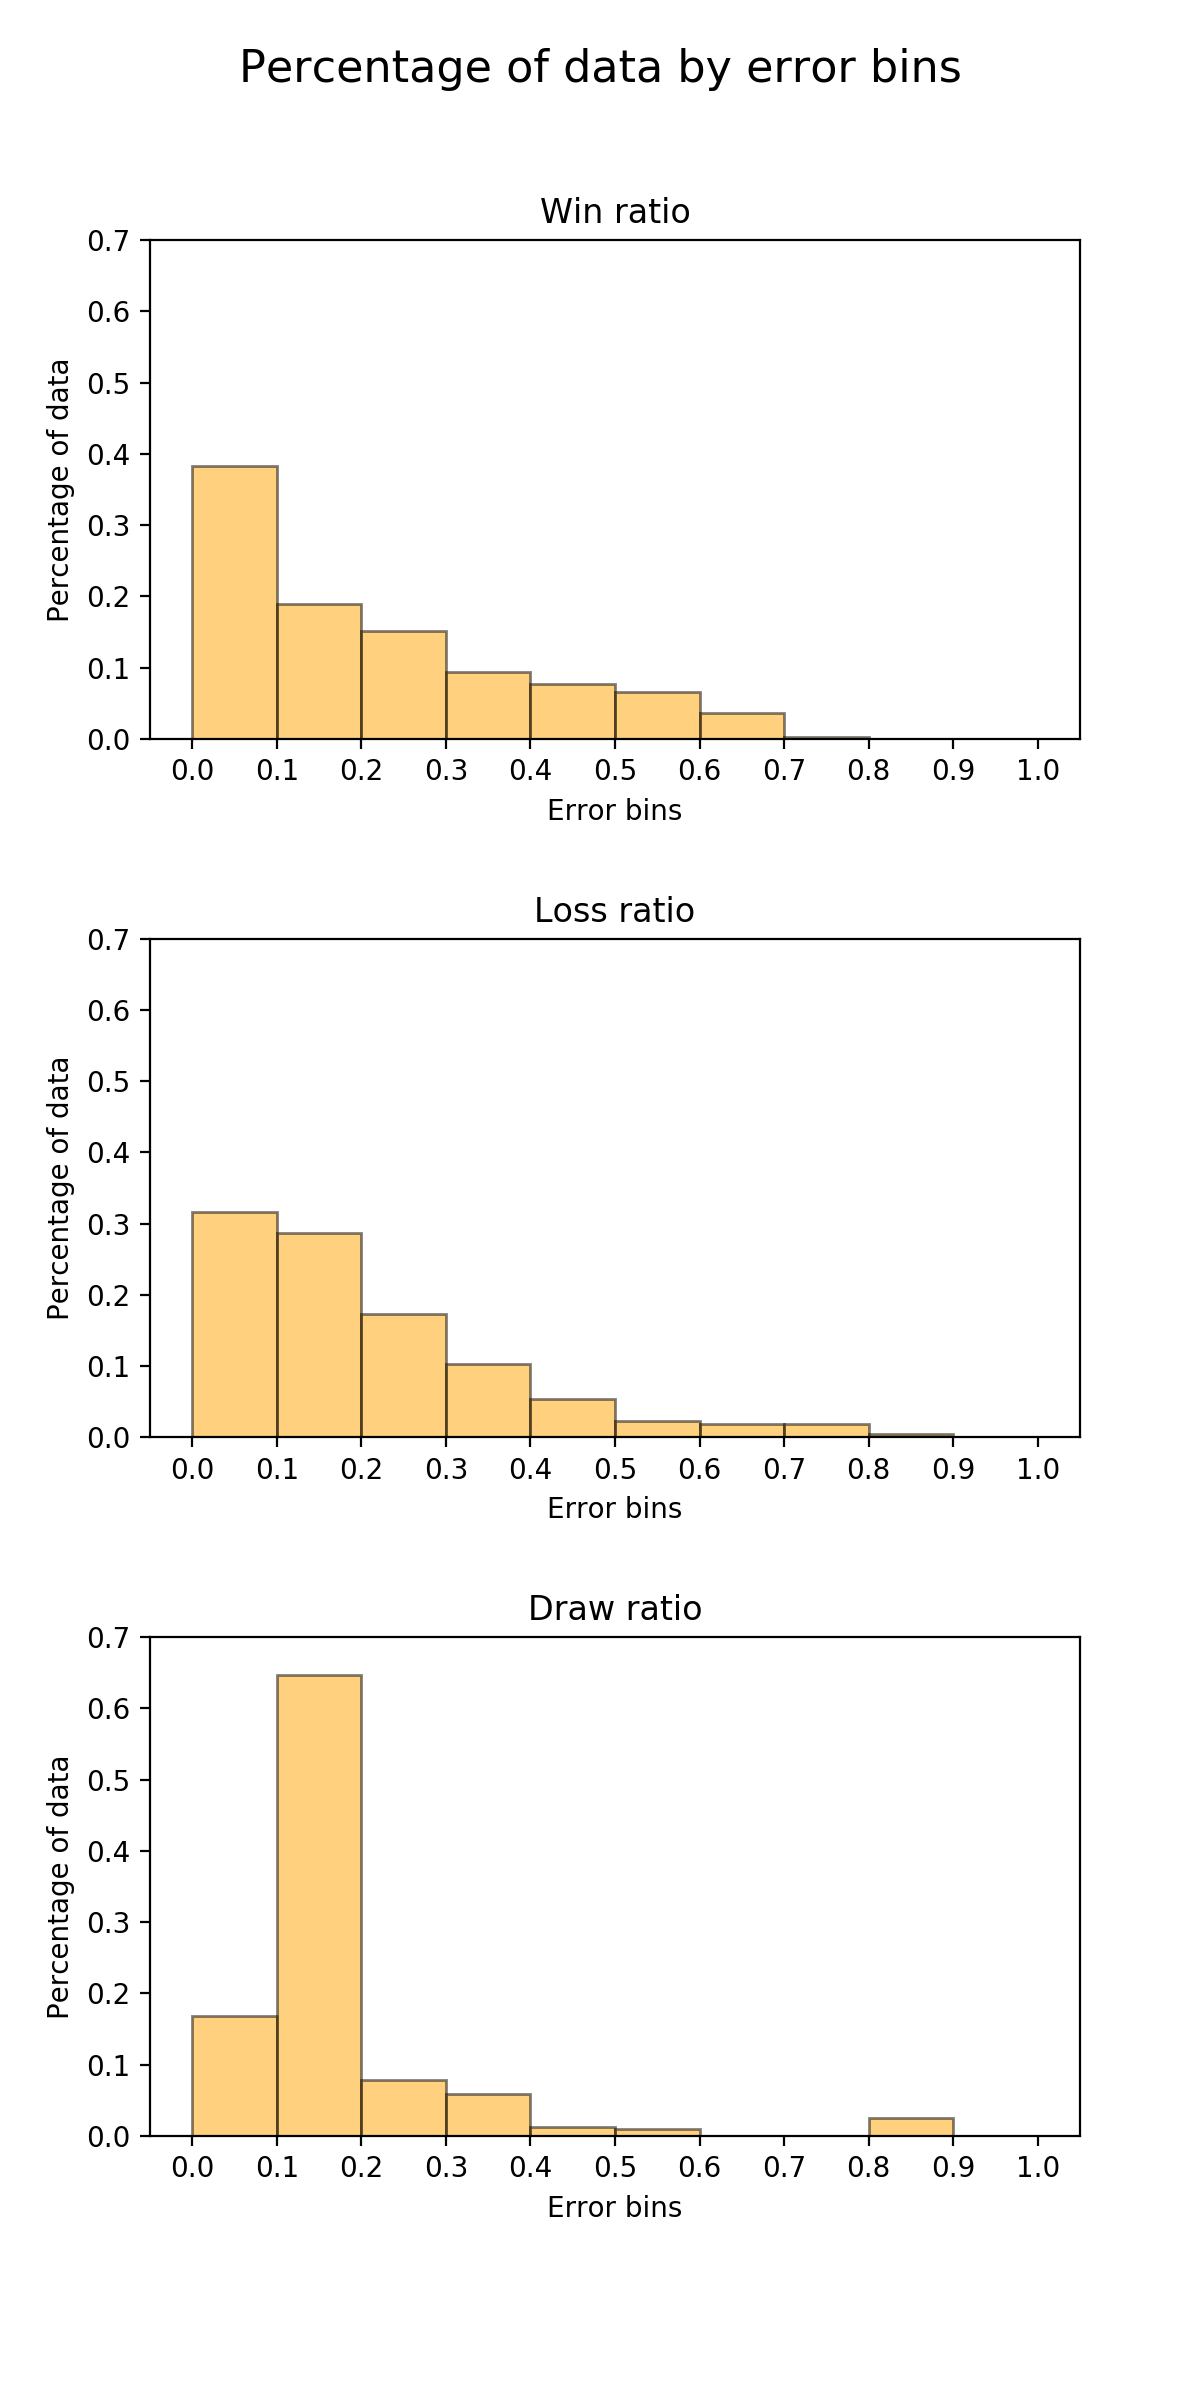

In [9]:
# Error bins.
error_ranges = [(0.0, 1.0)] * 3
data_percentages_bins = nn.mutiple_error_bins_data_percentage(errors, error_ranges = error_ranges)

fig, axes = plt.subplots(3, figsize=(6, 12))
(ax1, ax2, ax3) = axes

for i in range(y_size):
    data_percentages, bins = data_percentages_bins[0][i]
    width = 1 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    axes[i].bar(center, data_percentages, align='center', width=width, color = color, edgecolor = edge_color, alpha = opacity)

plt.setp(axes, xticks = np.arange(0.0, 1.1, 0.1), yticks = np.arange(0.0, 0.8, 0.1))
fig.suptitle("Percentage of data by error bins", fontsize = 16)
ax1.set_title('Win ratio')
ax2.set_title('Loss ratio')
ax3.set_title('Draw ratio')
for ax in axes:
    ax.set_xlabel('Error bins')
    ax.set_ylabel('Percentage of data')
fig.subplots_adjust(top = 0.9, hspace = 0.4)

plt.show()

<IPython.core.display.Javascript object>


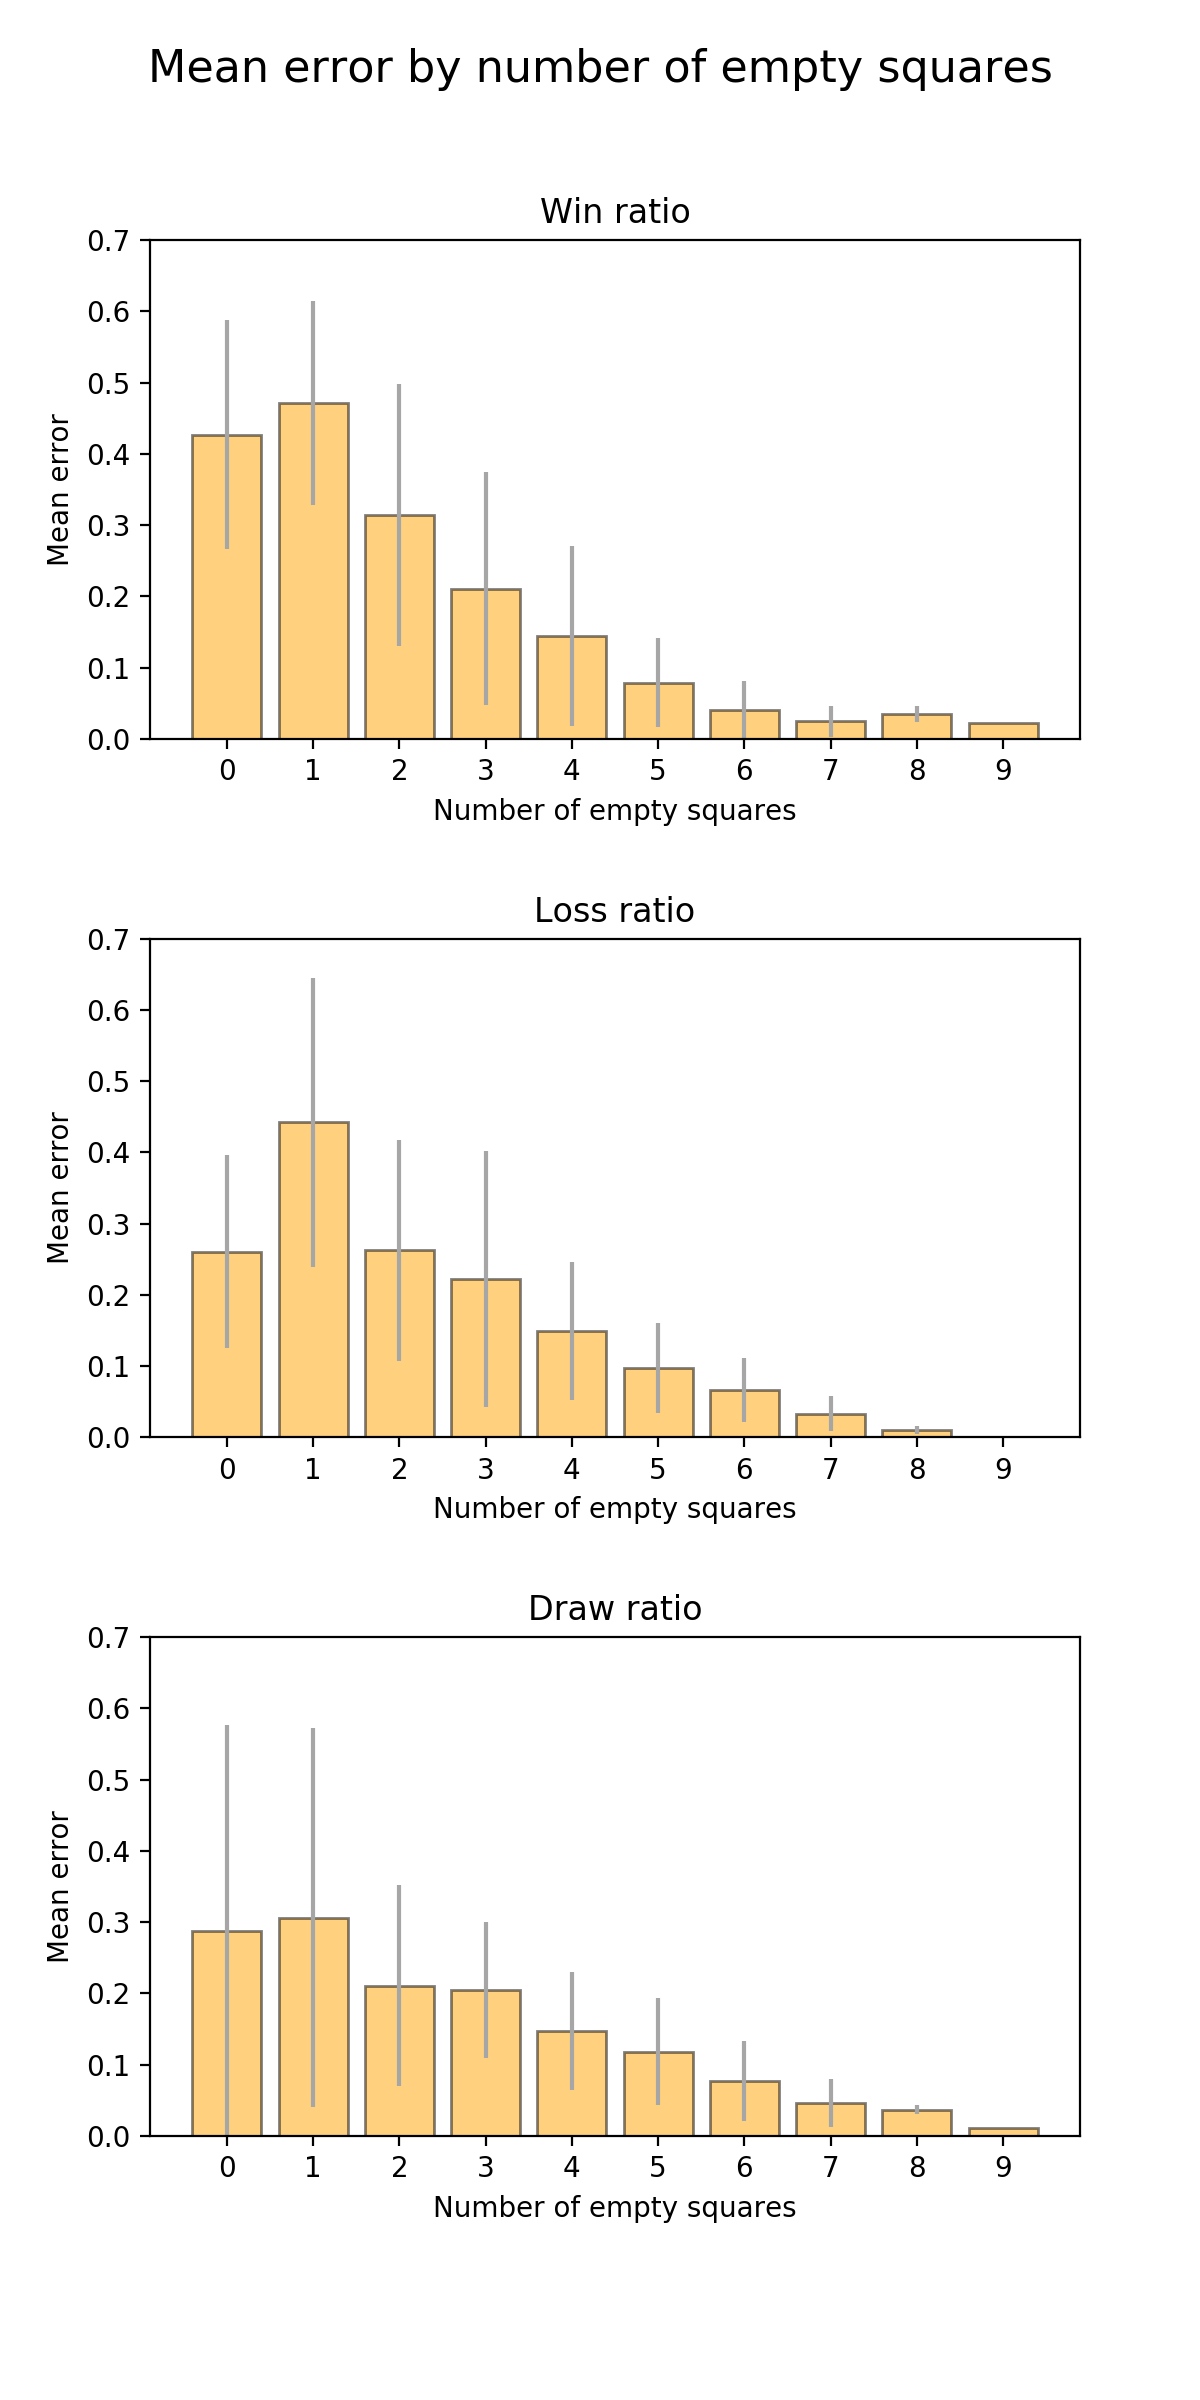

In [10]:
# Mean error.
mean_std_error = nn.mutiple_mean_standard_deviation_error_by_num_empty_squares(x, errors)
num_empty_squares = np.array(range(ttt.SIZE + 1))

fig, axes = plt.subplots(3, figsize=(6, 12))
(ax1, ax2, ax3) = axes

for i in range(y_size):
    mean_std = mean_std_error[0][i]
    mean = [mean for (mean, std) in  mean_std]
    std = [std for (mean, std) in  mean_std]
    axes[i].bar(num_empty_squares, mean, yerr = std, color = color, error_kw = {'ecolor': '0.65'}, edgecolor = edge_color, alpha = opacity)

plt.setp(axes, xticks = range(10), yticks = np.arange(0.0, 0.8, 0.1))
fig.suptitle("Mean error by number of empty squares", fontsize = 16)
ax1.set_title('Win ratio')
ax2.set_title('Loss ratio')
ax3.set_title('Draw ratio')
for ax in axes:
    ax.set_xlabel('Number of empty squares')
    ax.set_ylabel('Mean error')
    ax.set_ylim(ymin=0.0)
fig.subplots_adjust(top = 0.9, hspace = 0.4)

plt.show()